# ROOT PyROOT basics (Python)

## Objectives:
* How to open a TFile?
* How to inspect it?
* How to create/draw  histogram (1D/2D)?
* Loop on TTree entries
* Fit function




In [2]:
import ROOT

Welcome to JupyROOT 6.16/00


In order to activate the interactive visualisation we can use the [JSROOT](https://root.cern.ch/js/) magic:

In [16]:
%jsroot on

Open a TFile


In [17]:
f = ROOT.TFile.Open("data/mc_147771.Zmumu.root")

Inspect file

In [18]:
f.ls()

TFile**		data/mc_147771.Zmumu.root	
 TFile*		data/mc_147771.Zmumu.root	
  KEY: TTree	mini;1	4-vectors + variables required for scaling factors


Now access the TTree. t1.Print() takes ages. 

In [19]:
t1 = f.mini
t1.ls()

OBJ: TTree	mini	4-vectors + variables required for scaling factors : 0 at: 0x7227f90


Now we can scan the tree. Scan numerically some elements of the TTree. Don't remove the "10" in command line, it will crash the kernel of this notebook Usefull command if you want to have a first look at the variables. Scan("variable1:variable2:",condition, format, number of rows to be printed)

In [20]:
t1.Scan("eventNumber:vxp_z:lep_n:lep_pt","","colsize=5 precision=3",10)

16L

*******************************************************
*    Row   * Instance * event * vxp_z * lep_n * lep_p *
*******************************************************
*        0 *        0 *     9 *    41 *     2 * 3e+04 *
*        0 *        1 *     9 *    41 *     2 * 3e+04 *
*        1 *        0 *    28 *  56.8 *     2 * 4e+04 *
*        1 *        1 *    28 *  56.8 *     2 * 2e+04 *
*        2 *        0 *    36 * -50.3 *     2 * 4e+04 *
*        2 *        1 *    36 * -50.3 *     2 * 7e+03 *
*        3 *        0 *    38 *  3.26 *     1 * 4e+04 *
*        4 *        0 *    47 * -9.99 *     1 * 6e+04 *
*        5 *        0 *    67 *  3.04 *     1 * 3e+04 *
*        6 *        0 *    68 * -42.5 *     2 * 5e+04 *
*        6 *        1 *    68 * -42.5 *     2 * 3e+04 *
*        7 *        0 *    76 * -2.32 *     2 * 4e+04 *
*        7 *        1 *    76 * -2.32 *     2 * 4e+04 *
*        8 *        0 *    79 *  15.3 *     2 * 4e+04 *
*        8 *        1 *    79 *  15.3 *     2 * 

We can now draw the histogram. We will at first create a [canvas](https://root.cern.ch/doc/master/classTCanvas.html), the entity which in ROOT holds graphics primitives. Note that thanks to [JSROOT](https://root.cern.ch/js/), this is not a static plot but an interactive visualisation. Try to play with it and save it as image when you are satisfied!
Difference with CINT: Tree.Draw() does NOT store htemp histograms

In [21]:
c1 = ROOT.TCanvas("c1","My Canvas",400,400)
t1.Draw("lep_pt","lep_pt<100000");
#htemp.Draw() # does NOT work!
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Time to import TH1F class (histogram). You an use dir() to know what are the methods available

In [22]:
from ROOT import TH1F
dir(TH1F)

['AbstractMethod',
 'Add',
 'AddAt',
 'AddBinContent',
 'AddDirectory',
 'AddDirectoryStatus',
 'Adopt',
 'AndersonDarlingTest',
 'AppendPad',
 'At',
 'Browse',
 'BufferEmpty',
 'CanExtendAllAxes',
 'CheckedHash',
 'Chi2Test',
 'Chi2TestX',
 'Chisquare',
 'Class',
 'ClassName',
 'Class_Name',
 'Class_Version',
 'Clear',
 'ClearUnderflowAndOverflow',
 'Clone',
 'Compare',
 'ComputeIntegral',
 'Copy',
 'DeclFileLine',
 'DeclFileName',
 'Delete',
 'Dictionary',
 'DirectoryAutoAdd',
 'DistancetoLine',
 'DistancetoPrimitive',
 'Divide',
 'Draw',
 'DrawClass',
 'DrawClone',
 'DrawCopy',
 'DrawNormalized',
 'DrawPanel',
 'Dump',
 'Error',
 'Eval',
 'Execute',
 'ExecuteEvent',
 'ExtendAxis',
 'FFT',
 'Fatal',
 'Fill',
 'FillBuffer',
 'FillN',
 'FillRandom',
 'FindBin',
 'FindFirstBinAbove',
 'FindFixBin',
 'FindLastBinAbove',
 'FindObject',
 'Fit',
 'FitOptionsMake',
 'FitPanel',
 'GetArray',
 'GetAsymmetry',
 'GetAt',
 'GetAxisColor',
 'GetBarOffset',
 'GetBarWidth',
 'GetBin',
 'GetBinCenter

In [23]:
h1 = TH1F("h1","Leading Lepton Pt",100,0,100000);
t1.Draw("lep_pt[0]>>h1");
h1.Draw()
c1.Draw()

Exercise ... Replicate the CINT/CLING in PyROOT

## Plot non standard variable

Access in PyROOT the TTree contents

In [27]:
#t1 = my_file.Get("mini")
#t1.ls()
#t1.Print()

from ROOT import TLorentzVector

h_mumu= ROOT.TH1F("h_mumu","Invariant mass",50,50,150);
N = t1.GetEntries()
#t1.SetBranchStatus("*",0)
#t1.SetBranchStatus("lep_pt",1)
#t1.SetBranchStatus("lep_eta",1)
#t1.SetBranchStatus("lep_phi",1)
#t1.SetBranchStatus("lep_E",1)
num_evt = lambda  x: x if x<10000 else 10000
print "Looping on ", num_evt(N), " entries"
for i in xrange(num_evt(N)):
    t1.GetEntry(i)

    for ilep in xrange(t1.lep_n):
        ivec = TLorentzVector()
        ivec.SetPtEtaPhiE(t1.lep_pt[ilep],t1.lep_eta[ilep],t1.lep_phi[ilep],t1.lep_E[ilep])
        for jlep in xrange(t1.lep_n):
            if ilep==jlep:
                continue
            jvec = TLorentzVector()
            jvec.SetPtEtaPhiE(t1.lep_pt[jlep],t1.lep_eta[jlep],t1.lep_phi[jlep],t1.lep_E[jlep])
            inv_mass = (ivec+jvec).Mag()
            h_mumu.Fill(inv_mass/1000.)



c1.cd()
h_mumu.Draw()
c1.Draw()

 Looping on  10000  entries


Warning in <TFile::Append>: Replacing existing TH1: h_mumu (Potential memory leak).


## Write many histograms to a file

In [6]:
from ROOT import TH1F
my_file_list = ["data/mc_117049.ttbar_had.root","data/mc_117050.ttbar_lep.root"]
iff = int(0)
my_new_file =TFile("histo_py.root", "recreate")
for ifile in my_file_list:
    my_file = TFile(ifile,"READ")
    my_tree = my_file.Get("mini")
    h1_str = "h1_"+str(iff)
    h1 = TH1F(h1_str,"pt leading lepton",100,0,100)
    iff = int(iff)+1
    command_str = "lep_pt[0]/1000.>>"+h1_str
    my_tree.Draw(command_str)
    my_new_file.cd()
    h1.Write()
    

my_new_file.Write()
my_new_file.Close()

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


## Read many histograms from a file


Total number of histo is:  2  Total number of rows 1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


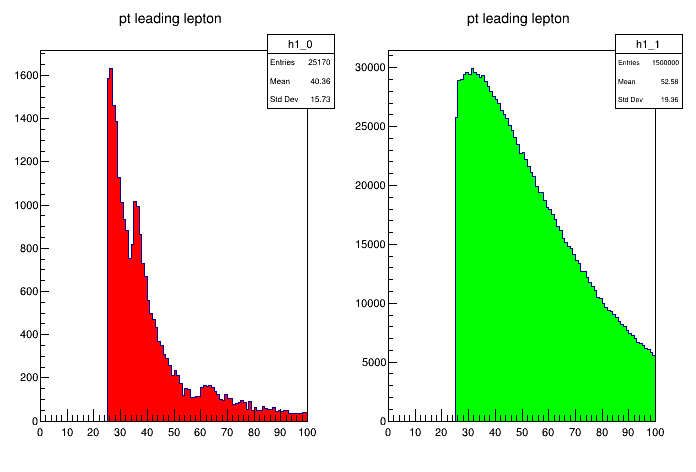

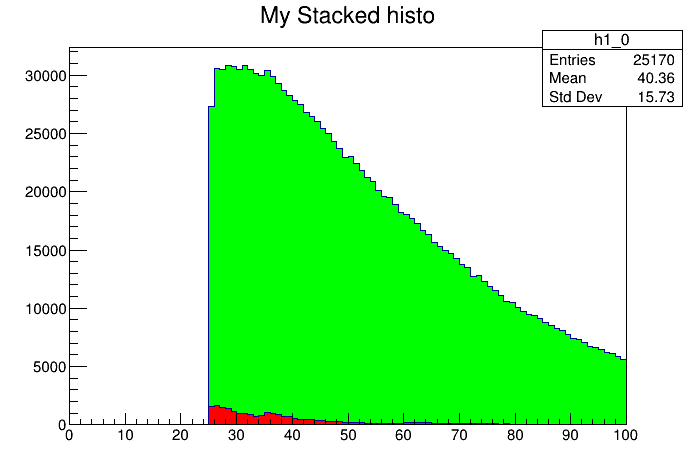

In [11]:
my_file =TFile("histo_py.root", "READ")
from ROOT import TCanvas
hnames = []
histo_num=0
for key in my_file.GetListOfKeys():
    h = key.ReadObj()
    if h.ClassName() == 'TH1F' or h.ClassName() == 'TH2F':
        hnames.append(h.GetName())
        histo_num = histo_num+1


c1 = TCanvas("c1","Many Histo PyRoot")
num_row = histo_num/2
num_row = int(num_row+0.5)
c1.Divide(2,num_row)

print "Total number of histo is: ", histo_num, " Total number of rows", num_row 
histo_num1=1
for ihisto in hnames:
    c1.cd(histo_num1)
    h1 = my_file.Get(ihisto)
    h1.Draw()
    histo_num1 = histo_num1+1
c1.Draw()


histo_num2=1
c2 = TCanvas("c2","Stacked Histo")
ths1 = ROOT.THStack("hs","My Stacked histo")
for ihisto in hnames:
    h1 = my_file.Get(ihisto)
    h1.SetFillColor(histo_num2+1)
    ths1.Add(h1)
    histo_num2 = histo_num2+1
ths1.Draw()
c2.Draw()



## Input/Output to TFile

Writing to file is simple. Just open a TFile with NEW or RECREATE option

In [ ]:
def writeHisto(outputFileName):
    outputFile = ROOT.TFile(outputFileName, "RECREATE")
    # now we write to the file
    h1.Write()

In [ ]:
writeHisto("data/outputPyRoot.root")

In [ ]:
%%bash
rootls -l data/outputPyRoot.root

In [ ]:
inputFile = ROOT.TFile("data/outputPyRoot.root")
h = inputFile.h1
c = ROOT.TCanvas()
h.Draw()
c.Draw()

In [4]:
%edit scripts/PyRootLoopTree.py

In [5]:
%%file scripts/PyRootLoopTree.py

UsageError: %%file is a cell magic, but the cell body is empty.


## Create a subsample of event file 

In [4]:
# number of events in filtered file
nevt_out = 10000
from ROOT import TFile, TTree
my_random = ROOT.TRandom3()
my_file =TFile("data/mc_147771.Zmumu.root","READ")
my_tree = my_file.Get("mini")
nentries = my_tree.GetEntries()
# activate all branches
my_tree.SetBranchStatus("*", 1)
my_new_file =TFile("smaller_py.root", "recreate")
newtree = my_tree.CloneTree(0)
for i in range(0, nentries):
# do something smaller
#for i in range(0, nevt_out)
    my_tree.GetEntry(i)
    # doing something clever
    if my_random.Rndm()<(nevt_out/nentries):
        newtree.Fill()
        

newtree.Print()
my_new_file.Write()
my_new_file.ls()


******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :        0 : Total =           24844 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :        0 : Total  Size=        501 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=     860672 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :        0 : Total  Size=        509 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=     860672 bytes  Compression=   1.00     *
*...................................................